In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/DATASCI 210/fy2026_safmrs.xlsx'

In [5]:
# Step 3: Load dataset
df = pd.read_excel(file_path)

In [6]:
# Inspect structure
print("Columns:", df.columns.tolist())
print(df.head())
print(df.info())

Columns: ['ZIP\nCode', 'HUD Area Code', 'HUD Fair Market Rent Area Name', 'SAFMR\n0BR', 'SAFMR\n0BR - 90%\nPayment\nStandard', 'SAFMR\n0BR - 110%\nPayment\nStandard', 'SAFMR\n1BR', 'SAFMR\n1BR - 90%\nPayment\nStandard', 'SAFMR\n1BR - 110%\nPayment\nStandard', 'SAFMR\n2BR', 'SAFMR\n2BR - 90%\nPayment\nStandard', 'SAFMR\n2BR - 110%\nPayment\nStandard', 'SAFMR\n3BR', 'SAFMR\n3BR - 90%\nPayment\nStandard', 'SAFMR\n3BR - 110%\nPayment\nStandard', 'SAFMR\n4BR', 'SAFMR\n4BR - 90%\nPayment\nStandard', 'SAFMR\n4BR - 110%\nPayment\nStandard']
   ZIP\nCode     HUD Area Code HUD Fair Market Rent Area Name  SAFMR\n0BR  \
0      76437  METRO10180M10180                Abilene, TX MSA         850   
1      76443  METRO10180M10180                Abilene, TX MSA         850   
2      76464  METRO10180M10180                Abilene, TX MSA         850   
3      76469  METRO10180M10180                Abilene, TX MSA         850   
4      79501  METRO10180M10180                Abilene, TX MSA         900   

In [7]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()


In [8]:
rent_cols = [col for col in df.columns if "br" in col.lower() or "rent" in col.lower()]
print(df[rent_cols].describe())


         safmr\n0br  safmr\n0br_-_90%\npayment\nstandard  \
count  51895.000000                         51895.000000   
mean    1046.556701                           941.901031   
std      461.087034                           414.978331   
min      390.000000                           351.000000   
25%      740.000000                           666.000000   
50%      870.000000                           783.000000   
75%     1190.000000                          1071.000000   
max     3950.000000                          3555.000000   

       safmr\n0br_-_110%\npayment\nstandard    safmr\n1br  \
count                          51895.000000  51895.000000   
mean                            1151.212371   1128.805280   
std                              507.195737    499.074654   
min                              429.000000    390.000000   
25%                              814.000000    790.000000   
50%                              957.000000    940.000000   
75%                             

In [11]:
rent_cols = ['safmr\n0br','safmr\n1br','safmr\n2br','safmr\n3br','safmr\n4br']
summary = df[rent_cols].describe()
print(summary)

         safmr\n0br    safmr\n1br    safmr\n2br    safmr\n3br    safmr\n4br
count  51895.000000  51895.000000  51895.000000  51895.000000  51895.000000
mean    1046.556701   1128.805280   1374.995279   1780.949417   2043.759514
std      461.087034    499.074654    577.345820    740.086287    851.469114
min      390.000000    390.000000    480.000000    630.000000    640.000000
25%      740.000000    790.000000    980.000000   1280.000000   1460.000000
50%      870.000000    940.000000   1150.000000   1500.000000   1720.000000
75%     1190.000000   1290.000000   1560.000000   2040.000000   2380.000000
max     3950.000000   4140.000000   5230.000000   6670.000000   7720.000000


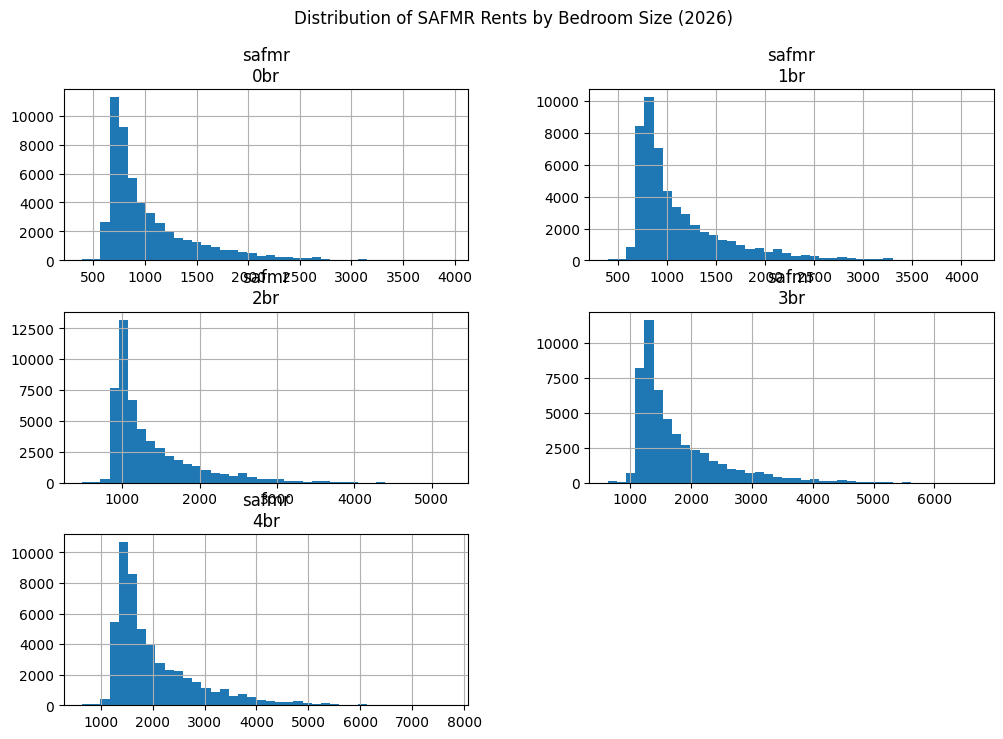

In [12]:
df[rent_cols].hist(bins=40, figsize=(12,8))
plt.suptitle("Distribution of SAFMR Rents by Bedroom Size (2026)")
plt.show()


In [13]:
corr = df[rent_cols].corr()
print(corr)


            safmr\n0br  safmr\n1br  safmr\n2br  safmr\n3br  safmr\n4br
safmr\n0br    1.000000    0.991798    0.983725    0.975617    0.968469
safmr\n1br    0.991798    1.000000    0.991432    0.983347    0.973150
safmr\n2br    0.983725    0.991432    1.000000    0.993109    0.980322
safmr\n3br    0.975617    0.983347    0.993109    1.000000    0.987230
safmr\n4br    0.968469    0.973150    0.980322    0.987230    1.000000


In [15]:
top_zipcodes = df[['zip\ncode','safmr\n2br']].sort_values(by='safmr\n2br', ascending=False).head(10)
print(top_zipcodes)

       zip\ncode  safmr\n2br
22941      95060        5230
22605      94404        5010
22943      95062        4940
22931      95003        4810
22946      95065        4800
22936      95017        4800
13703      92660        4760
13708      92673        4740
22728      95134        4740
22566      94105        4730


In [20]:
# Filter rows where the HUD Area Name contains "New York"
nyc_data = df[df['hud_fair_market_rent_area_name'].str.contains("New York", case=False, na=False)]

# Display unique area names (so you see how HUD labels NYC)
print("Unique HUD Area Names for NYC-related rows:")
print(nyc_data['hud_fair_market_rent_area_name'].unique())

# Show sample ZIP codes and SAFMRs
nyc_sample = nyc_data[['zip\ncode', 'hud_fair_market_rent_area_name',
                       'safmr\n0br','safmr\n1br', 'safmr\n2br', 'safmr\n3br', 'safmr\n4br']]

nyc_sample

Unique HUD Area Names for NYC-related rows:
['New York, NY HUD Metro FMR Area']


,zip\ncode,hud_fair_market_rent_area_name,safmr\n0br,safmr\n1br,safmr\n2br,safmr\n3br,safmr\n4br
16683,10001,"New York, NY HUD Metro FMR Area",3800,3990,4370,5470,5950
16684,10002,"New York, NY HUD Metro FMR Area",2170,2260,2510,3120,3370
16685,10003,"New York, NY HUD Metro FMR Area",3800,3990,4370,5470,5950
16686,10004,"New York, NY HUD Metro FMR Area",3120,3270,3590,4500,4880
16687,10005,"New York, NY HUD Metro FMR Area",3250,3400,3760,4680,5050
...,...,...,...,...,...,...,...
17088,12531,"New York, NY HUD Metro FMR Area",2170,2260,2510,3120,3370
17089,12533,"New York, NY HUD Metro FMR Area",2170,2260,2510,3120,3370
17090,12563,"New York, NY HUD Metro FMR Area",2280,2390,2620,3280,3560
17091,12564,"New York, NY HUD Metro FMR Area",2170,2260,2510,3120,3370


In [21]:
# Summary stats for SAFMRs
nyc_stats = nyc_sample[['safmr\n0br','safmr\n1br', 'safmr\n2br', 'safmr\n3br', 'safmr\n4br']].describe()
print(nyc_stats)


        safmr\n0br   safmr\n1br   safmr\n2br   safmr\n3br   safmr\n4br
count   410.000000   410.000000   410.000000   410.000000   410.000000
mean   2816.000000  2955.365854  3245.878049  4064.439024  4412.048780
std     453.639561   476.007220   517.005989   649.246170   707.617441
min    2170.000000  2260.000000  2510.000000  3120.000000  3370.000000
25%    2440.000000  2560.000000  2812.500000  3530.000000  3822.500000
50%    2750.000000  2890.000000  3175.000000  3975.000000  4320.000000
75%    3120.000000  3270.000000  3590.000000  4500.000000  4880.000000
max    3800.000000  3990.000000  4370.000000  5470.000000  5950.000000


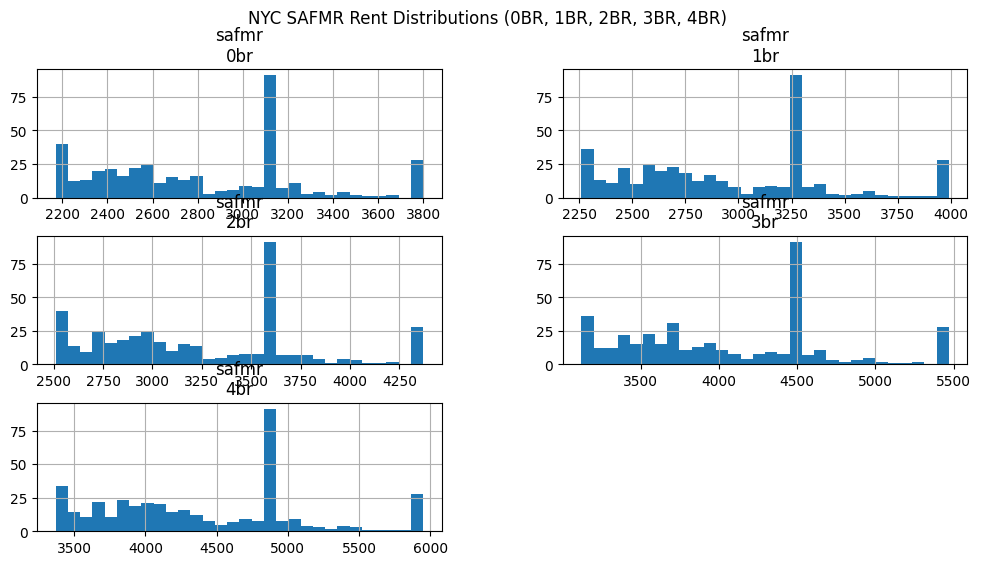

In [22]:
import matplotlib.pyplot as plt

nyc_sample[['safmr\n0br','safmr\n1br', 'safmr\n2br', 'safmr\n3br', 'safmr\n4br']].hist(bins=30, figsize=(12, 6))
plt.suptitle("NYC SAFMR Rent Distributions (0BR, 1BR, 2BR, 3BR, 4BR)")
plt.show()


In [25]:
# Compute average increase between consecutive bedroom sizes
nyc_sample['diff_1br_0br'] = nyc_sample['safmr\n1br'] - nyc_sample['safmr\n0br']
nyc_sample['diff_2br_1br'] = nyc_sample['safmr\n2br'] - nyc_sample['safmr\n1br']
nyc_sample['diff_3br_2br'] = nyc_sample['safmr\n3br'] - nyc_sample['safmr\n2br']
nyc_sample['diff_4br_3br'] = nyc_sample['safmr\n4br'] - nyc_sample['safmr\n3br']

# Calculate mean increase for each step
avg_increases = nyc_sample[['diff_1br_0br', 'diff_2br_1br', 'diff_3br_2br', 'diff_4br_3br']].mean()
print("Average Rent Increase Between Bedroom Sizes:")
print(avg_increases)


Average Rent Increase Between Bedroom Sizes:
diff_1br_0br    139.365854
diff_2br_1br    290.512195
diff_3br_2br    818.560976
diff_4br_3br    347.609756
dtype: float64


/tmp/ipython-input-1745197706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_sample['diff_1br_0br'] = nyc_sample['safmr\n1br'] - nyc_sample['safmr\n0br']
/tmp/ipython-input-1745197706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_sample['diff_2br_1br'] = nyc_sample['safmr\n2br'] - nyc_sample['safmr\n1br']
/tmp/ipython-input-1745197706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [24]:
top_5_expensive = nyc_sample.sort_values('safmr\n2br', ascending=False).head(5)
bottom_5_affordable = nyc_sample.sort_values('safmr\n2br', ascending=True).head(5)

print("Top 5 Expensive NYC ZIPs (2BR):")
print(top_5_expensive[['zip\ncode', 'safmr\n2br']])

print("\nTop 5 Affordable NYC ZIPs (2BR):")
print(bottom_5_affordable[['zip\ncode', 'safmr\n2br']])


Top 5 Expensive NYC ZIPs (2BR):
       zip\ncode  safmr\n2br
16683      10001        4370
16685      10003        4370
16724      10044        4370
16727      10065        4370
16728      10069        4370

Top 5 Affordable NYC ZIPs (2BR):
       zip\ncode  safmr\n2br
17092      12582        2510
16684      10002        2510
17091      12564        2510
17089      12533        2510
16711      10030        2510


In [31]:
#Rent ranges per bedroom
bedrooms = ['safmr\n0br','safmr\n1br','safmr\n2br','safmr\n3br','safmr\n4br']
for br in bedrooms:
    print(f"{br} - min: {nyc_sample[br].min()}, max: {nyc_sample[br].max()}")


safmr
0br - min: 2170, max: 3800
safmr
1br - min: 2260, max: 3990
safmr
2br - min: 2510, max: 4370
safmr
3br - min: 3120, max: 5470
safmr
4br - min: 3370, max: 5950


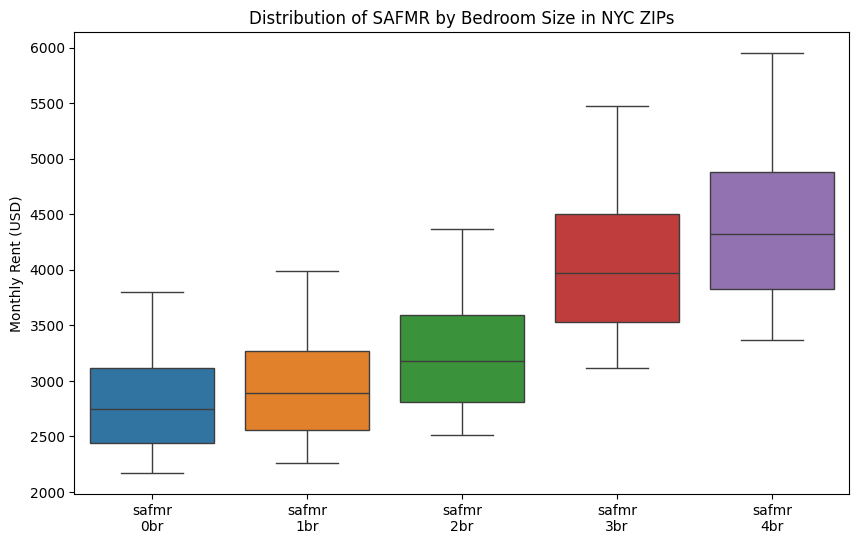

In [35]:
#Boxplot of rent distributions by bedroom
plt.figure(figsize=(10,6))
sns.boxplot(data=nyc_sample[bedrooms])
plt.title('Distribution of SAFMR by Bedroom Size in NYC ZIPs')
plt.ylabel('Monthly Rent (USD)')
plt.show()


In [47]:
import pandas as pd

# Load the ZORI CSV from Google Drive
file_path2 = "/content/drive/MyDrive/DATASCI 210/City_zori_uc_sfrcondomfr_sm_month.csv"
zori_df = pd.read_csv(file_path2)

In [48]:
# Inspect columns
print(zori_df.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2015-01-31', '2015-02-28',
       ...
       '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
       '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31'],
      dtype='object', length=136)


In [71]:
# Filter ZORI data for NYC ZIP codes
# Refined filter to get only the 'New York' city row
nyc_zori = zori_df[(zori_df['RegionName'] == 'New York') & (zori_df['RegionType'] == 'city')]
print(nyc_zori.head())

   RegionID  SizeRank RegionName RegionType StateName State  \
0      6181         0   New York       city        NY    NY   

                                   Metro     CountyName   2015-01-31  \
0  New York-Newark-Jersey City, NY-NJ-PA  Queens County  2681.690193   

    2015-02-28  ...   2024-11-30   2024-12-31   2025-01-31   2025-02-28  \
0  2696.314591  ...  3709.610062  3694.843982  3698.398169  3728.726614   

    2025-03-31   2025-04-30   2025-05-31   2025-06-30   2025-07-31  \
0  3772.252674  3821.360052  3858.042137  3908.684985  3953.954118   

    2025-08-31  
0  3989.200455  

[1 rows x 136 columns]


NYC Rent Statistics:
              ZORI
count   127.000000
mean   3131.609624
std     377.252146
min    2623.883980
25%    2839.544471
50%    2959.327894
75%    3516.112490
max    3989.200455


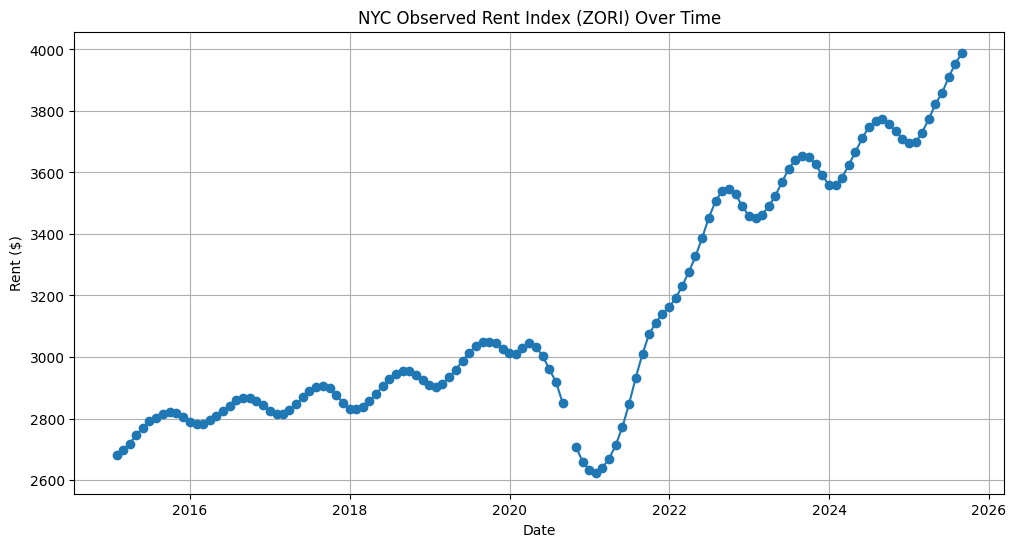

Monthly % Change in Rent:
count    127.000000
mean       0.318307
std        1.012480
min       -5.001712
25%       -0.337400
50%        0.444016
75%        0.904177
max        3.022244
Name: pct_change, dtype: float64


/tmp/ipython-input-1880837311.py:23: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  nyc_rent_data['pct_change'] = nyc_rent_data['ZORI'].pct_change() * 100


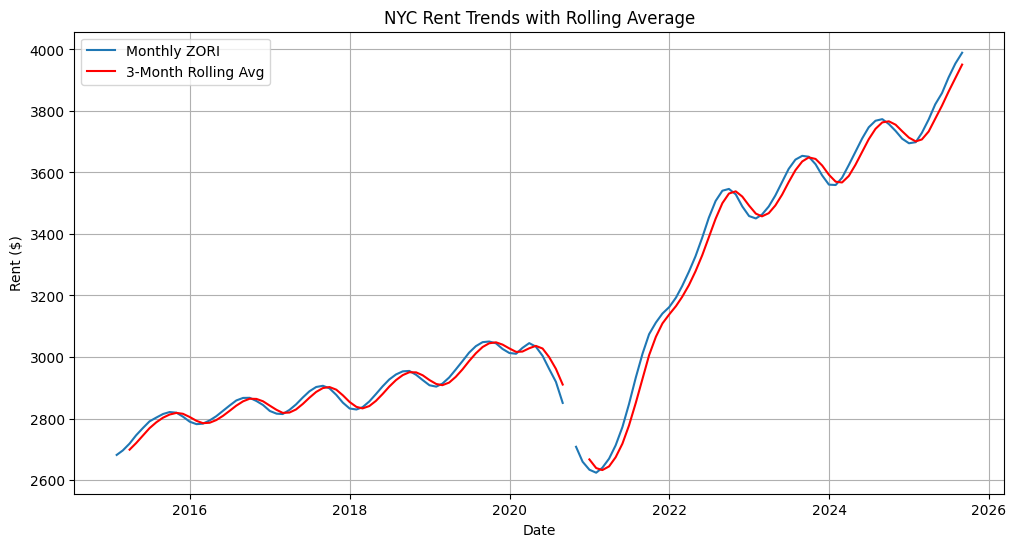

In [72]:
# Drop non-date columns to focus on rent data
date_columns = nyc_zori.columns[nyc_zori.columns.str.match(r'\d{4}-\d{2}-\d{2}')]
nyc_rent_data = nyc_zori[date_columns].transpose()
nyc_rent_data.columns = ['ZORI']

# Convert index to datetime
nyc_rent_data.index = pd.to_datetime(nyc_rent_data.index)

# Basic statistics
print("NYC Rent Statistics:")
print(nyc_rent_data.describe())

# Plot rent trends over time
plt.figure(figsize=(12,6))
plt.plot(nyc_rent_data.index, nyc_rent_data['ZORI'], marker='o', linestyle='-')
plt.title('NYC Observed Rent Index (ZORI) Over Time')
plt.xlabel('Date')
plt.ylabel('Rent ($)')
plt.grid(True)
plt.show()

# Compute monthly % change
nyc_rent_data['pct_change'] = nyc_rent_data['ZORI'].pct_change() * 100
print("Monthly % Change in Rent:")
print(nyc_rent_data['pct_change'].describe())

# Optional: rolling average to smooth trends
nyc_rent_data['rolling_avg_3mo'] = nyc_rent_data['ZORI'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(nyc_rent_data.index, nyc_rent_data['ZORI'], label='Monthly ZORI')
plt.plot(nyc_rent_data.index, nyc_rent_data['rolling_avg_3mo'], label='3-Month Rolling Avg', color='red')
plt.title('NYC Rent Trends with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Rent ($)')
plt.legend()
plt.grid(True)
plt.show()